# Probe sa ficerima

In [1]:
from ipyfilechooser import FileChooser
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

import parselmouth
import seaborn as sns
import os


In [3]:
fc = FileChooser()
# fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [14]:
print(fc.selected)

/Users/lenkavuckovic/Desktop/prepoznavanje emocija/baza/emodb/wav/newbaza/


In [17]:

samplerate, data = wavfile.read(fc.selected + "03a01Fa.wav0")
# data, samplerate = librosa.load(fc.selected + "03a01Fa.wav0") 

data
len(data)
plt.plot(data)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lenkavuckovic/Desktop/prepoznavanje emocija/baza/emodb/wav/newbaza/03a01Fa.wav0'

TypeError: can only concatenate str (not "NoneType") to str

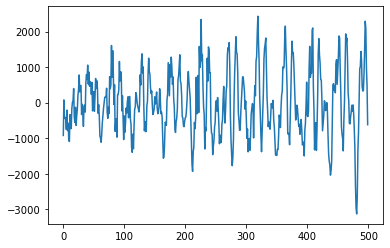

In [67]:
od = 10000
do = 10500
plt.plot(data[od:do])
plt.title("signal " + fc.selected_filename + " " + str(od) + " - " + str(do))
plt.xlabel("vreme[s]")
plt.ylabel("amplituda")
plt.show()

In [ ]:
len(data) * 1/samplerate

2.044125

---

### duzine svih fajlova iz foldera

In [5]:
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [2]:
duzine1 = []
duzine2 = []

proseci1 = []
proseci2 = []

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort()

for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 

          samplerate, data = wavfile.read(fc.selected + filename)
          duzina = len(data) * 1/samplerate

          suma = 0
          for i in data:
             suma += i
          # sm = sum(data)
          avg = suma/len(data);
          # print(suma)
          #W, L, E, A, F, T, N - emocije 

          
          emocija = filename[5]


          print(filename + ": Duzina: ", duzina, " [s] , avg: ", avg)

 

NameError: name 'fc' is not defined

In [ ]:
          
          # if emocija == 'T':
          #      duzine1.append(duzina)
          #      proseci1.append(avg)

          # elif emocija == 'W':
          #      duzine2.append(duzina)
          #      proseci2.append(avg)
               

          # elif emocija == 

In [70]:
duzine1
duzine2

[5.2993125,
 8.97825,
 4.09325,
 3.756375,
 5.905,
 5.9963125,
 4.97625,
 5.4973125,
 5.3410625,
 5.975625]

In [5]:
sns.set()

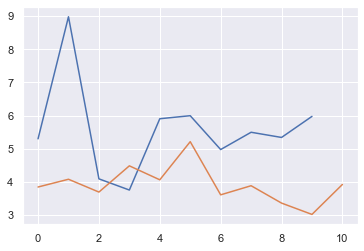

In [6]:
plt.plot(duzine1)
plt.plot(duzine2)


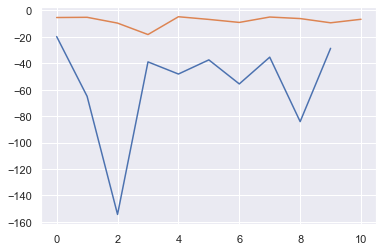

In [7]:
plt.plot(proseci1)
plt.plot(proseci2)

### koliko ima svake emocije ukupno i ostale informacije o tome
---

In [1]:
# importi
from ipyfilechooser import FileChooser
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

import parselmouth
import seaborn as sns
import os

import librosa, librosa.display
import IPython.display as ipd


from statistics import * # videcemo

In [2]:
# biranje foldera
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [29]:
fc.selected

'/Users/lenkavuckovic/Desktop/prepoznavanje emocija/baza/emodb/wav/newbaza/newbaza/'

In [3]:
# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano

duzine_emo = np.empty(7,dtype=object)
energija_emo = np.empty(7,dtype=object)
energija_arr_emo = np.empty(7,dtype=object)
zero_crossings_emo = np.empty(7,dtype=object)



duzine_emo[:] = [0],[0],[0],[0],[0],[0], [0]
energija_emo[:] = [0],[0],[0],[0],[0],[0], [0]
zero_crossings_emo[:] = [0],[0],[0],[0],[0],[0], [0]
energija_arr_emo[:] = [0],[0],[0],[0],[0],[0], [0]


# energija

# short term energija, frejmovano
frame_length = 480
hop_length = frame_length//2


for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
      
          # samplerate, data = wavfile.read(fc.selected + filename)
          data, samplerate = librosa.load(fc.selected + filename) 
          duzina = len(data) * 1/samplerate
            

          # print(suma)
          #      W, L, E, A, F, T, N - emocije 
          emo = ['W', 'L', 'E', 'A', 'F', 'T', 'N']
          
          emocija = filename[5]

          indx = emo.index(emocija)


          energy_arr = np.array([
               sum(abs(data[i:i+frame_length]**2))
               for i in range(0, len(data), hop_length)])

          energy = sum(abs(data**2))  ## ukupna energija fajla
          zero_crossings = librosa.zero_crossings(data, pad=False)

          parcici = []
          for i in range(0, len(data),hop_length):
               parcici.append( data[i : i +frame_length ])

          for i in range(len(parcici)):          
               new_filename = filename + str(i)
               wavfile.write(fc.selected + "newbaza/" + new_filename, samplerate, parcici[i].astype(np.int16))
              #  print("a")

          energija_emo[indx].append(energy)
          energija_arr_emo[indx].append(energy_arr)

          duzine_emo[indx].append(duzina)
          zero_crossings_emo[indx].append(zero_crossings)
          # print(filename + ": Duzina: ", duzina, " [s]")


# uklanjanje nula
for i in range(0,7):
    duzine_emo[i].pop(0)
    energija_emo[i].pop(0)
    zero_crossings_emo[i].pop(0)
    energija_arr_emo[i].pop(0)

 

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


KeyboardInterrupt: 

In [ ]:
duzine_emo


[]

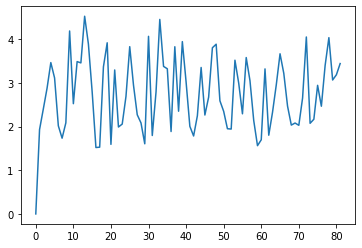

In [37]:
plt.plot(duzine_emo[1])
plt.plot()

In [ ]:
energija_emo

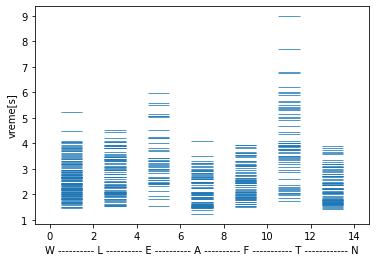

In [55]:
# fensi eventplot da vidimo sve ako bi moglo
# plt.style.use('_mpl-gallery')

# https://matplotlib.org/stable/plot_types/stats/eventplot.html#sphx-glr-plot-types-stats-eventplot-py

fig, ax = plt.subplots()

x = np.arange(1,15,2)

ax.eventplot(duzine_emo, orientation="vertical", lineoffsets=x, linewidth=0.75)

plt.ylabel("vreme[s]")
plt.xlabel("W ---------- L ---------- E ---------- A ---------- F ----------- T ------------ N")


plt.show()

### ,,,,,,,,,,W -- L -- E -- A -- F -- T -- N

In [31]:
for i in range(0,7):
    # duzine_emo[i]
    print(emo[i], " ukupno", round(sum(duzine_emo[i]),4 ), " [s] min:", round(min(duzine_emo[i]),4), " [s] max:", round(max(duzine_emo[i]),4), " [s]" )

W  ukupno 335.3809  [s] min: 1.4658  [s] max: 5.2135  [s]
L  ukupno 225.0971  [s] min: 1.5201  [s] max: 4.5258  [s]
E  ukupno 154.2304  [s] min: 1.5238  [s] max: 5.9638  [s]
A  ukupno 154.103  [s] min: 1.2255  [s] max: 4.1014  [s]
F  ukupno 180.6216  [s] min: 1.4814  [s] max: 3.9309  [s]
T  ukupno 251.2795  [s] min: 1.7357  [s] max: 8.9782  [s]
N  ukupno 186.3796  [s] min: 1.4308  [s] max: 3.8992  [s]


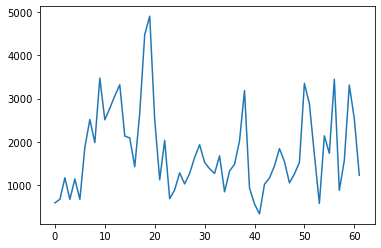

In [50]:
plt.plot(energija_emo[5])

In [26]:
energija_emo.shape
fig = plt.figure(figsize =(10, 7))
type(energija_emo[0])

numpy.ndarray

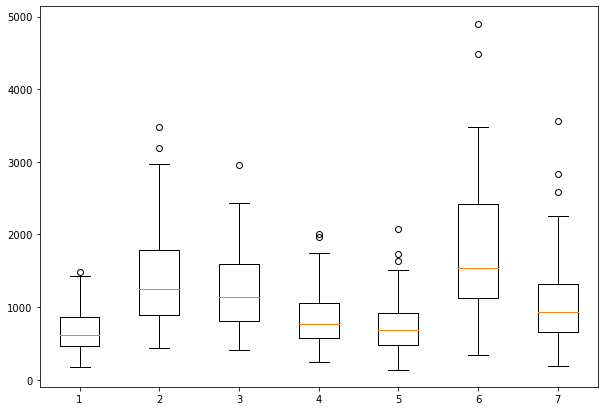

In [48]:
fig = plt.figure(figsize =(10, 7))


plt.boxplot(energija_emo)
plt.show()

### ovde je energija svih fajlova koju smo prvo boxplotovali

In [51]:
energije_ukupne_svi_fajlovi = energija_emo

---

In [ ]:
fig = plt.figure(figsize =(10, 7))


# plt.boxplot(zero_crossings_emo[0])
plt.plot(zero_crossings_emo[0])
plt.show()

In [80]:
sum(zero_crossings_emo)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [ ]:
plt.boxplot(energija_arr_emo[:][0][0]) # ne valja trenutno

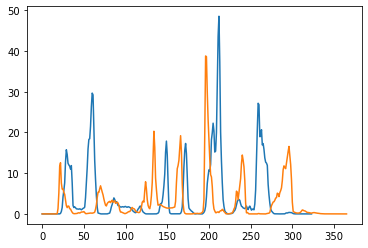

In [104]:
# poredjenje dva rand fajla ili emocije, njihova short term energija
plt.plot(energija_arr_emo[0][0])
plt.plot(energija_arr_emo[0][1])


---

### lista meanova po emocijama

In [145]:
lista_meanova = np.empty(7,dtype=object)
lista_meanova[:] = [0],[0],[0],[0],[0],[0], [0]

lista_max = np.empty(7,dtype=object)
lista_max[:] = [0],[0],[0],[0],[0],[0], [0]

lista_min = np.empty(7,dtype=object)
lista_min[:] = [0],[0],[0],[0],[0],[0], [0]

lista_stdev = np.empty(7,dtype=object)
lista_stdev[:] = [0],[0],[0],[0],[0],[0], [0]




for i in range (len(emo)):
    for y in range(len(energija_arr_emo[i])):
        lista_meanova[i].append(mean(energija_arr_emo[i][y]))
        lista_min[i].append(min(energija_arr_emo[i][y]))
        lista_max[i].append(max(energija_arr_emo[i][y]))
        lista_stdev[i].append(stdev(energija_arr_emo[i][y]))

for i in range(7):
    lista_meanova[i].pop(0)
    lista_max[i].pop(0)
    lista_min[i].pop(0)
    lista_stdev[i].pop(0)

In [142]:
lista_meanova[0][0]


4.147523623822825

{'whiskers': [<matplotlib.lines.Line2D at 0x13c266820>,
 'caps': [<matplotlib.lines.Line2D at 0x13c266f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c266490>,
 'medians': [<matplotlib.lines.Line2D at 0x13c25cfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c25c040>,
 'means': []}

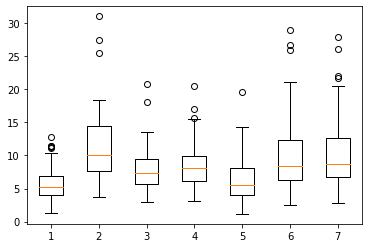

In [150]:
plt.boxplot(lista_meanova)

meanovi po emocijama

{'whiskers': [<matplotlib.lines.Line2D at 0x13663ed90>,
 'caps': [<matplotlib.lines.Line2D at 0x13653b4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13663ea00>,
 'medians': [<matplotlib.lines.Line2D at 0x13653bc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x13653bfa0>,
 'means': []}

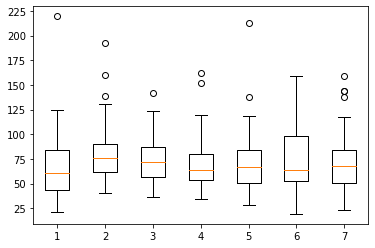

In [146]:
plt.boxplot(lista_max)

{'whiskers': [<matplotlib.lines.Line2D at 0x1368f0460>,
 'caps': [<matplotlib.lines.Line2D at 0x1368f0b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1368f00d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1368fc2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1368fc670>,
 'means': []}

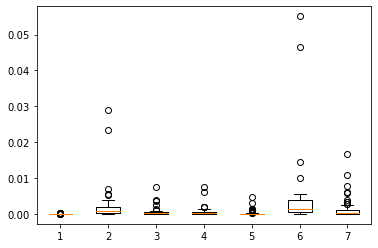

In [147]:
plt.boxplot(lista_min)

{'whiskers': [<matplotlib.lines.Line2D at 0x136a592b0>,
 'caps': [<matplotlib.lines.Line2D at 0x13c3b5e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x13660a1c0>,
 'medians': [<matplotlib.lines.Line2D at 0x13c3b5a00>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c3b5af0>,
 'means': []}

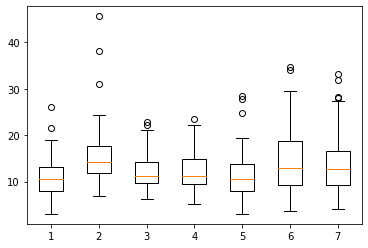

In [149]:
plt.boxplot(lista_stdev)